In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf

cf.go_offline()
%matplotlib inline
plt.style.use('ggplot')

In [2]:
por_data = pd.read_csv("student-por.csv", sep = ';') #importing of dataset as por_data
por_data.head() #first five values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
por_data.tail() #last five values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [4]:
por_data.shape

(649, 33)

* The portuguese dataset has 649 observations with 33 different columns

In [5]:
por_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

* Checking the datatype of all the columns and counting the number of null value present per column

In [6]:
objects = por_data.select_dtypes(include = "object").columns
print (objects)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


* Finding the features with object datatype for later use

In [7]:
integers = por_data.select_dtypes(include = "int64").columns
print (integers)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


* Finding the features with integer datatype for later use

In [8]:
por_data['G1'].describe() #Getting destriptive statistics

count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

* The average grade of all the students in portuguese seems to be 11.90

In [9]:
por_data.corr()['G3'].sort_values() #looking for highly correlated features

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famrel        0.063361
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64

* Since G1, G2 are highly correlated to G3 in compared to other features we can assume that it is possible to predict student's future grade base on G1 and G2

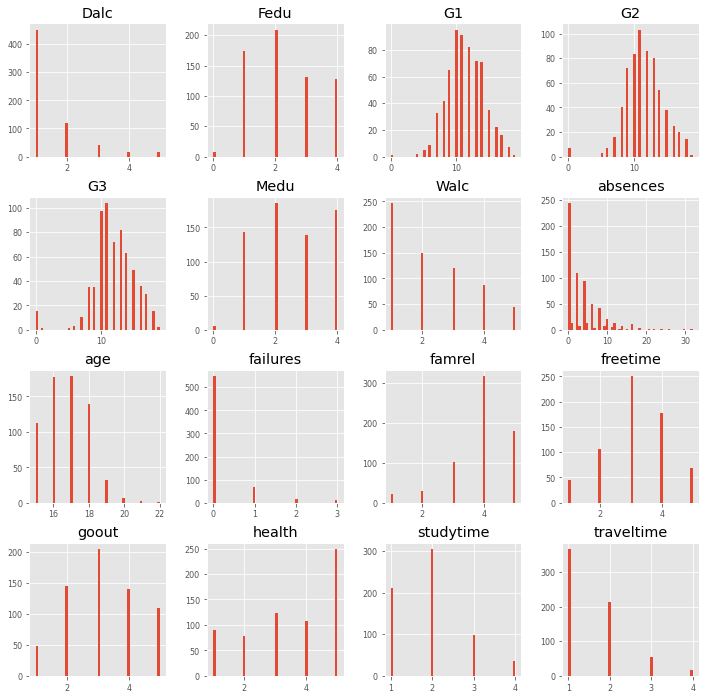

In [10]:
por_data.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8);

# Student's Grade Analysis 

In [11]:
(np.mean(por_data['G1']), np.mean(por_data['G2']), np.mean(por_data['G3']))

(11.399075500770415, 11.570107858243452, 11.906009244992296)

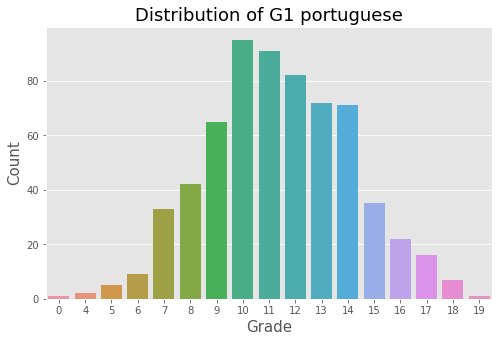

In [12]:
# por_data['G1'].iplot(kind='hist',bins=50, title="Distribution of G1 portuguese", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =por_data['G1']);
mat.axes.set_title('Distribution of G1 portuguese', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

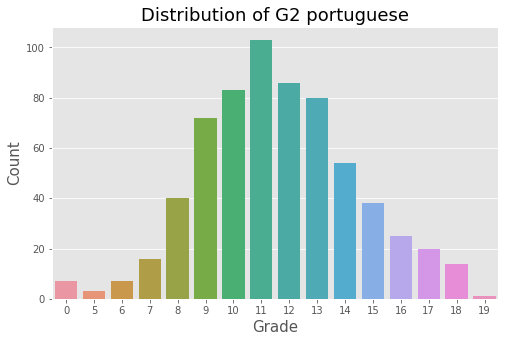

In [13]:
# por_data['G2'].iplot(kind='hist',bins=50, title="Distribution of G2 on portuguese", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =por_data['G2']);
mat.axes.set_title('Distribution of G2 portuguese', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

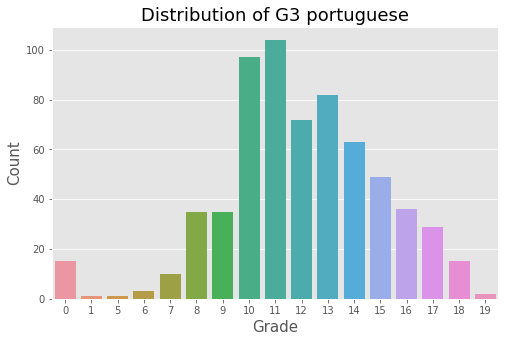

In [14]:
# por_data['G3'].iplot(kind='hist',bins=50, title="Distribution of Final grade on portuguese", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =por_data['G3']);
mat.axes.set_title('Distribution of G3 portuguese', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

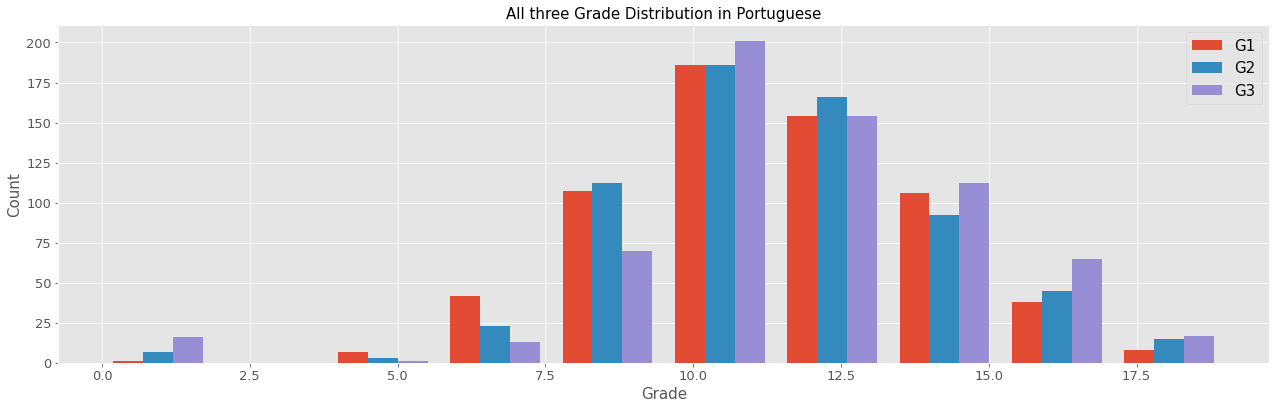

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,6))
n_bins = 10

grade_portuguese = [por_data['G1'],por_data['G2'],por_data['G3']]
ax.hist(grade_portuguese, n_bins, histtype='bar', label = ['G1','G2','G3'])
ax.legend(prop={'size': 15})
ax.set_title('All three Grade Distribution in Portuguese',fontsize = 15)
ax.set_xlabel('Grade', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
fig.tight_layout(pad=2)
ax.tick_params(axis='both', labelsize=13)
plt.show()

In [16]:
(por_data['G3'] == 0).value_counts()

False    634
True      15
Name: G3, dtype: int64

* In Grade Distribution of portuguese we can see the increasing trend in final grade (G3).

## Student's Sex Analysis 

In [17]:
por_data['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

* There are total of 383 female and 266 male

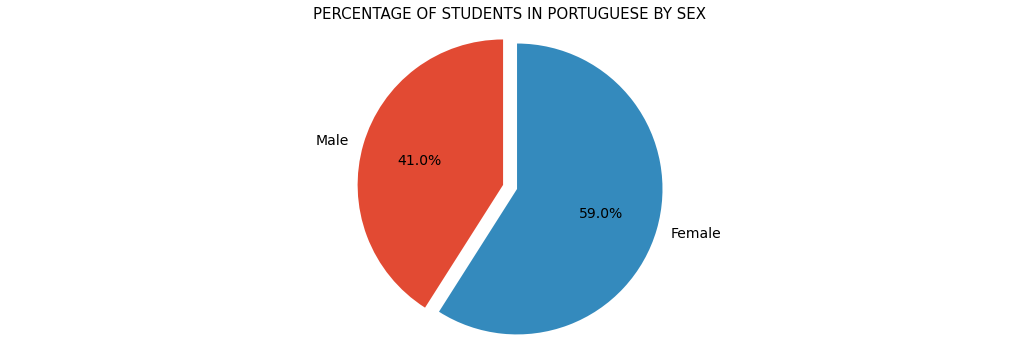

In [18]:
plt.style.use('ggplot')
size = [266,383]
labels = 'Male', 'Female'
explode = [0, 0.1]
fig, (axes2) =  plt.subplots(figsize=(18,6))
axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90, textprops={'fontsize': 14})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS IN PORTUGUESE BY SEX", fontsize = 15)
plt.show()

* About 41% of student in our dataset are male where as the rest of 59.% of them are Female

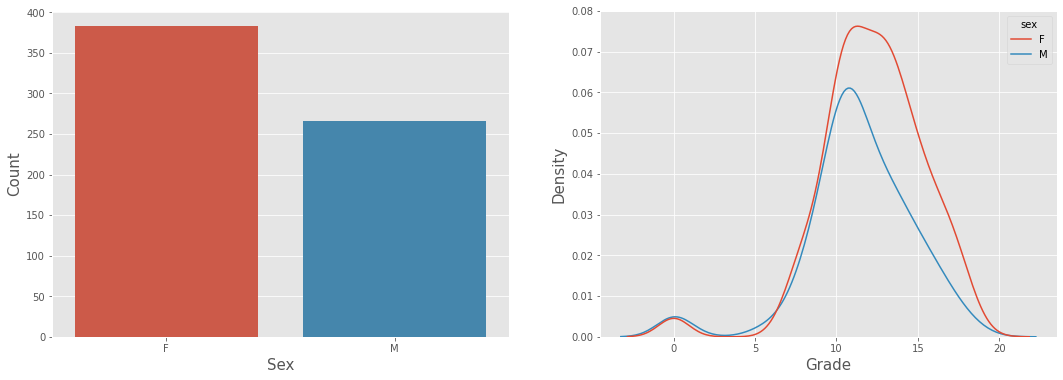

In [19]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))

hist = sns.countplot(x = por_data['sex'],ax = axes[0])
hist.set_xlabel('Sex', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15)

a = sns.kdeplot(data=por_data, x="G3", hue="sex",ax = axes[1])
a.set_xlabel('Grade', fontsize = 15)
a.set_ylabel('Density', fontsize = 15)
plt.show()

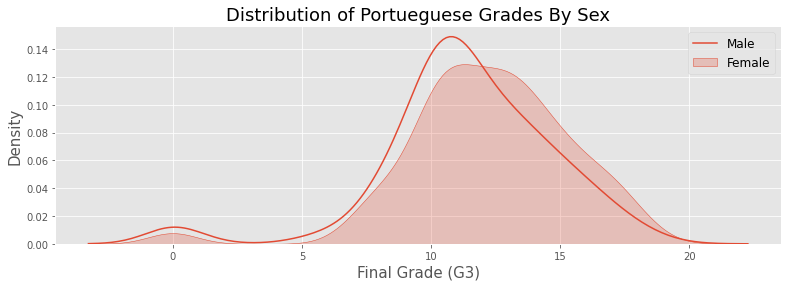

In [20]:
plt.style.use('ggplot')
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(por_data.loc[por_data['sex'] == 'M', 'G3'], label='Male', shade = False)
plt.title('Distribution of Portueguese Grades By Sex',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* The final grade(G3) distribution for both male and female seems to be slightly different where the females seems to perform better then male on their Final exams of Portuguese.

## Age Analysis of Student's

In [21]:
por_data['age'].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

* The no. of students present in the age group 20-22 seems to be pretty low.

In [22]:
por_data['age'].iplot(kind='hist',bins=15, title="Final Grade Distribution of Student By Age",
                        xTitle='Age',yTitle='Count')

In [23]:
por_data.iplot(kind='scatter',x='age',y='G3',mode='markers',size=8, 
                    title="Distribution of Final Grade based on age", xTitle='Age',yTitle='Final Grade')  

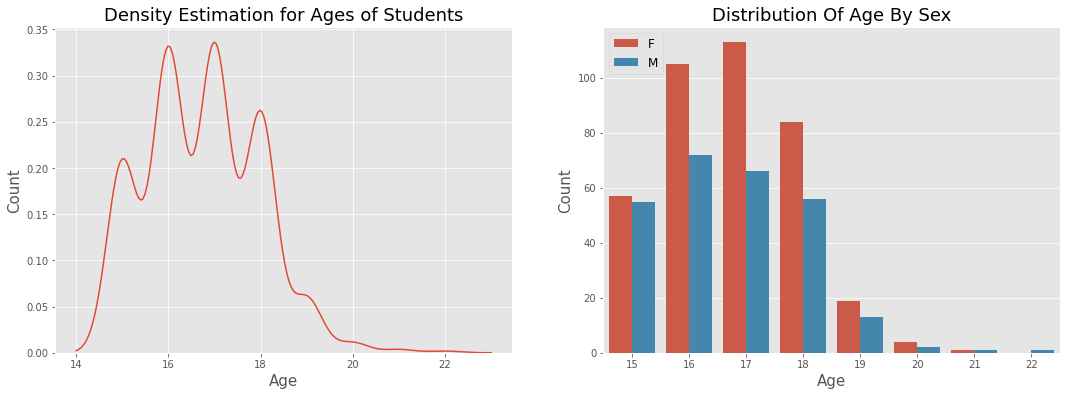

In [24]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))

kd = sns.kdeplot(por_data['age'],ax = axes[0])    
kd.axes.set_title('Density Estimation for Ages of Students', fontsize = 18)
kd.set_xlabel('Age', fontsize = 15)
kd.set_ylabel('Count', fontsize = 15)

b = sns.countplot(x=por_data['age'],hue=por_data['sex'],ax = axes[1])
b.axes.set_title('Distribution Of Age By Sex', fontsize = 18)
b.set_xlabel("Age", fontsize = 15)
b.set_ylabel("Count", fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

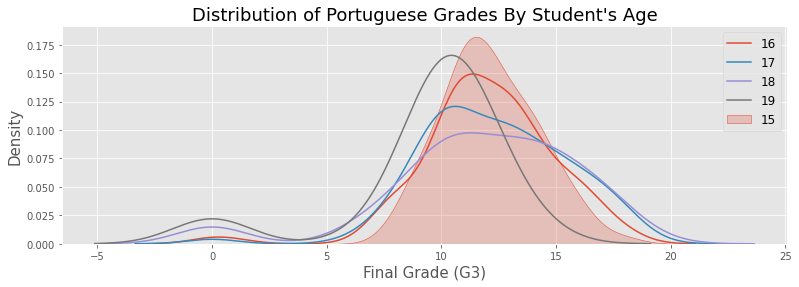

In [25]:
fig =  plt.subplots(figsize=(13,4))

sns.kdeplot(por_data.loc[por_data['age'] == 15, 'G3'], label='15', shade = True)
sns.kdeplot(por_data.loc[por_data['age'] == 16, 'G3'], label='16', shade = False)
sns.kdeplot(por_data.loc[por_data['age'] == 17, 'G3'], label='17', shade = False)
sns.kdeplot(por_data.loc[por_data['age'] == 18, 'G3'], label='18', shade = False)
sns.kdeplot(por_data.loc[por_data['age'] == 19, 'G3'], label='19', shade = False)

plt.title('Distribution of Portuguese Grades By Student\'s Age',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [26]:
a = por_data.loc[por_data['age'] == 15, 'G3']
b = por_data.loc[por_data['age'] == 16, 'G3']
c = por_data.loc[por_data['age'] == 17, 'G3']
d = por_data.loc[por_data['age'] == 18, 'G3']
e = por_data.loc[por_data['age'] == 19, 'G3']

print("The average Portuguese Grade of Student Based on Their Age")
print("15 : " , a.mean())
print("16 : " , b.mean())
print("17 : " , c.mean())
print("18 : " , d.mean())
print("20 : " , e.mean())

The average Portuguese Grade of Student Based on Their Age
15 :  12.107142857142858
16 :  11.994350282485875
17 :  12.268156424581006
18 :  11.771428571428572
20 :  9.53125


* It seems that students of age group 15 and 17 outperforms others. 
* In the age ranges from 15-19, There also seems to be some outlers for the age 20,21,22 (failed students)

## Student living In Urabn and Rural Area

In [27]:
por_data['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

* There are 452 people living in urban area where as 197 are in Rural area
* About 69.6%  of total students lives in Urban region

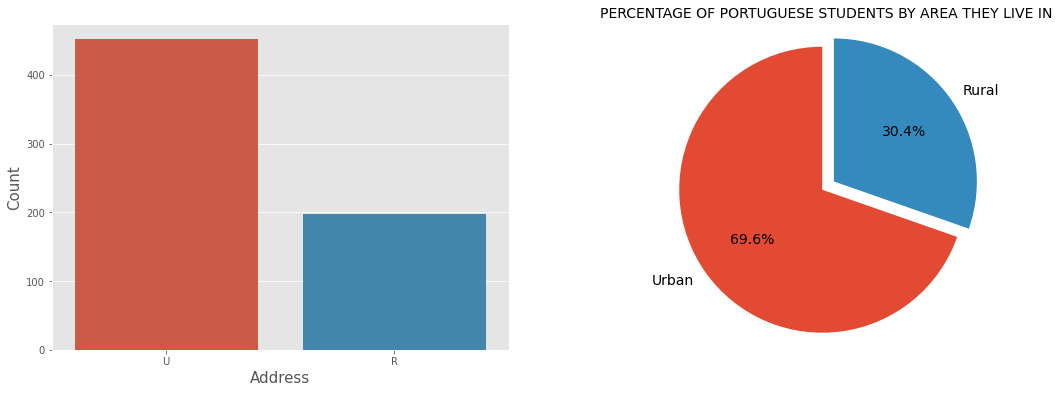

In [28]:
plt.style.use('ggplot')

size = [452,197]
labels = 'Urban', 'Rural'
explode = [0, 0.1]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))
hist = sns.countplot(x = por_data['address'], ax=axes1 )
# hist.axes.set_title('Students Living In  ', fontsize = 20)
hist.set_xlabel('Address', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15);

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90, textprops={'fontsize': 14})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF PORTUGUESE STUDENTS BY AREA THEY LIVE IN ", fontsize = 14)

plt.show()

* The graphs above clarely states that there is a huge number of students living in Urban area

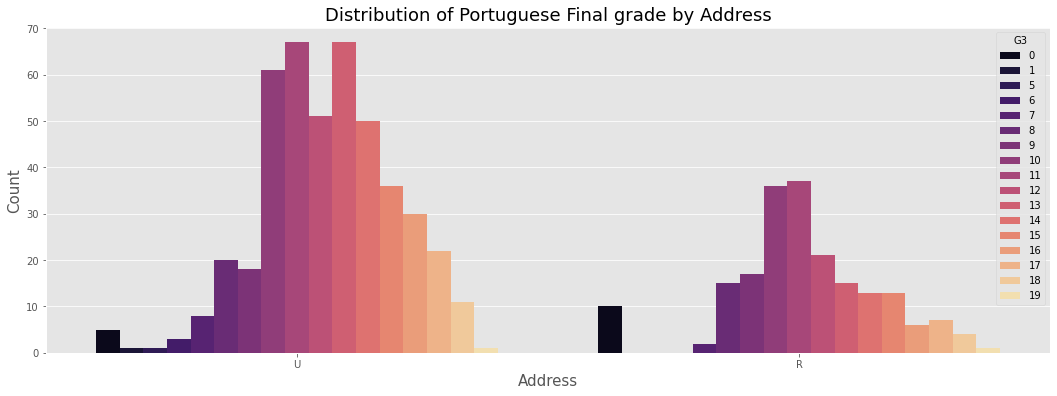

In [29]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(figsize=(18,6))

a = sns.countplot(x=por_data['address'],hue=por_data['G3'],palette='magma')
a.axes.set_title('Distribution of Portuguese Final grade by Address', fontsize = 18)
a.set_xlabel('Address', fontsize = 15)
a.set_ylabel('Count', fontsize = 15)
plt.show()

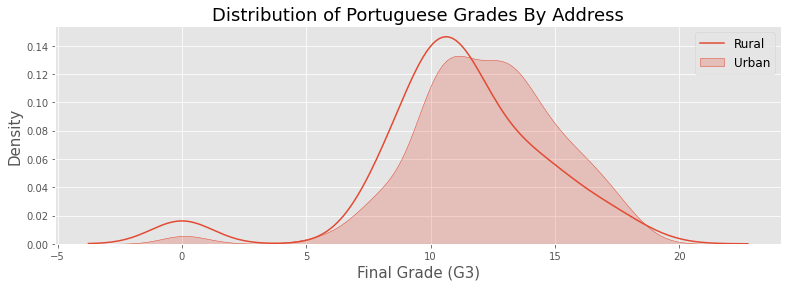

In [30]:
plt.style.use('ggplot')
fig=  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(por_data.loc[por_data['address'] == 'R', 'G3'], label='Rural', shade = False)
plt.title('Distribution of Portuguese Grades By Address',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* From the above plot we can reach a conclusion that the students living in Urban region seems to perform comparatively better then the students living in the Rural areas.

In [31]:
u = por_data.loc[por_data['address'] == 'U', 'G3']
r = por_data.loc[por_data['address'] == 'R', 'G3']
print("The average Portuguese Grade of Student")
print("Urban : " , u.mean())
print("Rural : " , r.mean())

The average Portuguese Grade of Student
Urban :  12.263274336283185
Rural :  11.086294416243655


* We can see the average portuguese grade of students living in Urban area is higher than that of rural area 

## Student's Analysis Based on School

In [32]:
por_data['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

* The no.of students studying portuguese from 'Mousinho da Silveira HS' is comparatively very low in compare to 'Gabriel Pereira HS'.

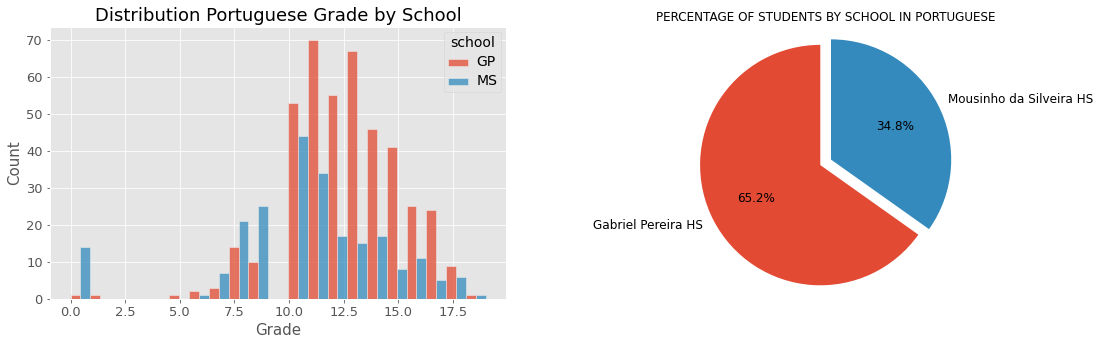

In [33]:
plt.style.use('ggplot')

size = [423,226]
labels = 'Gabriel Pereira HS', 'Mousinho da Silveira HS'
explode = [0, 0.1]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,5))
mat = sns.histplot(x = por_data['G3'],hue =por_data['school'] , multiple="dodge", ax=axes1)
mat.axes.set_title('Distribution Portuguese Grade by School', fontsize = 18)
mat.set_xlabel('Grade', fontsize = 15)
mat.set_ylabel('Count', fontsize = 15)
mat.tick_params(axis='both', labelsize=13)

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90,  textprops={'fontsize': 12})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS BY SCHOOL IN PORTUGUESE", fontsize = 12)

plt.setp(axes1.get_legend().get_texts(), fontsize='14')
plt.setp(axes1.get_legend().get_title(), fontsize='14')
plt.show()

*  About 34.8% of student in our dataset are from "Mousinho da Silveira HS" where as the rest of 65.2% of them are from "Gabriel Pereira HS"

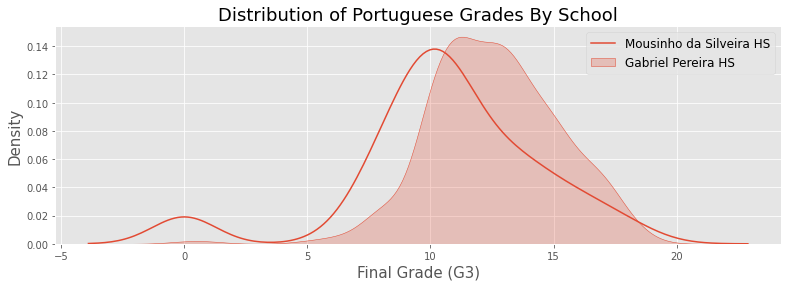

In [34]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['school'] == 'GP', 'G3'], label='Gabriel Pereira HS', shade = True)
sns.kdeplot(por_data.loc[por_data['school'] == 'MS', 'G3'], label='Mousinho da Silveira HS', shade = False)
plt.title('Distribution of Portuguese Grades By School',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* Between two schools 'Gabriel Pereira HS' and 'Mousinho da Silveira HS' the distribution of portuguese grade is higher in GP. 
* We can also see the plots for 'Distribution of Portuguese Grades By School' and 'Distribution of Portuguese Grades By Address' lining up with one anonther, concluding that the 'Gabriel Pereira HS' is present in Urban area where as 'Mousinho da Silveira HS' is present in rural area

## Analysis Based on Student's StudyTime

In [35]:
por_data['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

*Weekly Study Time*
* 1 = below 2 hours 
* 2 = 2 to 5 hours
* 3 = 5 to 10 hours
* 4 = above 10 hours

It seems that the number of students reading 2 to 5 hr a week and below 2 hr a week are higher.

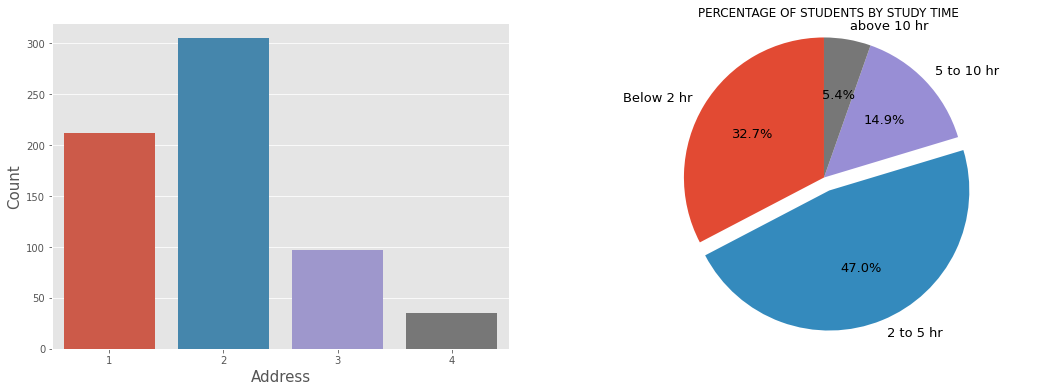

In [36]:
size = [212,305,97,35]
labels = 'Below 2 hr','2 to 5 hr', '5 to 10 hr', 'above 10 hr'
explode = [0, 0.1, 0, 0]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))
hist = sns.countplot(x = por_data['studytime'], ax=axes1 )
# hist.axes.set_title('Students Living In  ', fontsize = 20)
hist.set_xlabel('Address', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15);

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90,  textprops={'fontsize': 13})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS BY STUDY TIME", fontsize = 12)
plt.show()

* 47% of students seems to commit a studytime of 2-5hr a week.  

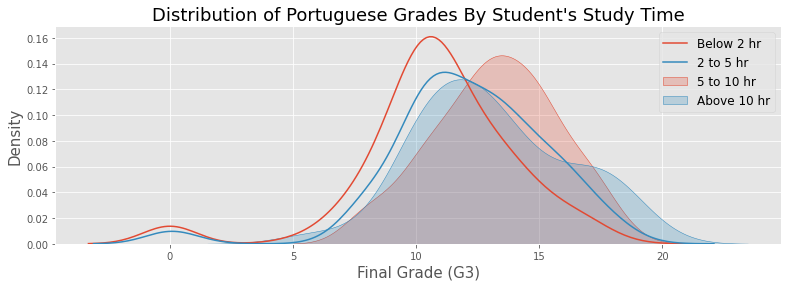

In [37]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['studytime'] == 1, 'G3'], label='Below 2 hr', shade = False)
sns.kdeplot(por_data.loc[por_data['studytime'] == 2, 'G3'], label='2 to 5 hr', shade = False)
sns.kdeplot(por_data.loc[por_data['studytime'] == 3, 'G3'], label='5 to 10 hr', shade = True)
sns.kdeplot(por_data.loc[por_data['studytime'] == 4, 'G3'], label='Above 10 hr', shade = True)

plt.title('Distribution of Portuguese Grades By Student\'s Study Time',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* We see that the students who commit more then 5 hr a week for on their studies seems to perform comparatively well then other students with less then 5 hr a week

In [38]:
por_data['studytime'].corr(por_data['G3']) #identifying the correlation

0.249788689998863

*There seems is a positive correlation between Final grade G3 and studytime of student even though they dont seem to be strongly related we can reach a conclusion that when studytime increase the Final Grade increases too*.

## Grade Analysis By Father's Education

In [39]:
por_data['Fedu'].value_counts()

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

*Father Education*
* 0 = None
* 1 = Primary Education
* 2 = 5 to 9th Grade
* 3 = Secondary Education
* 4 = Higher Education

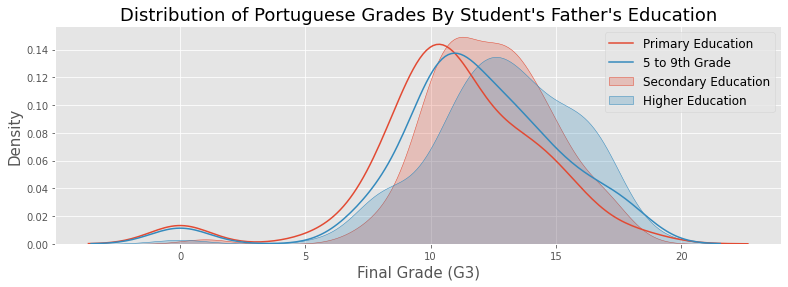

In [40]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['Fedu'] == 1, 'G3'], label='Primary Education', shade = False)
sns.kdeplot(por_data.loc[por_data['Fedu'] == 2, 'G3'], label='5 to 9th Grade', shade = False)
sns.kdeplot(por_data.loc[por_data['Fedu'] == 3, 'G3'], label='Secondary Education', shade = True)
sns.kdeplot(por_data.loc[por_data['Fedu'] == 4, 'G3'], label='Higher Education', shade = True)

plt.title('Distribution of Portuguese Grades By Student\'s Father\'s Education',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [41]:
n = por_data.loc[por_data['Fedu'] == 0, 'G3']
p = por_data.loc[por_data['Fedu'] == 1, 'G3']
f = por_data.loc[por_data['Fedu'] == 2, 'G3']
s = por_data.loc[por_data['Fedu'] == 3, 'G3']
h = por_data.loc[por_data['Fedu'] == 4, 'G3']

print("The average Portuguese Grade of Student Based on Father's Education ")
print("Primary Education : " , p.mean())
print("5 to 9th Grade : " , f.mean())
print("Secondary Education : " , s.mean())
print("Higher Education : " , h.mean())

The average Portuguese Grade of Student Based on Father's Education 
Primary Education :  10.936781609195402
5 to 9th Grade :  11.78468899521531
Secondary Education :  12.381679389312977
Higher Education :  12.921875


* It seems that the students whose father have received secondary or higher education outperforms others 

## Grade Analysis By Mother Education

In [42]:
por_data['Medu'].value_counts()

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

*Mother Education*
* 0 = None
* 1 = Primary Education
* 2 = 5 to 9th Grade
* 3 = Secondary Education
* 4 = Higher Education

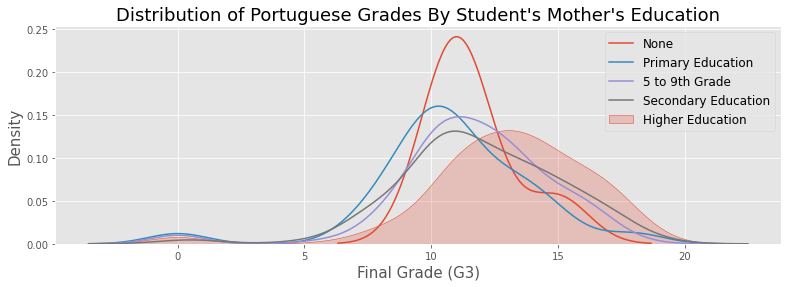

In [43]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['Medu'] == 0, 'G3'], label='None', shade = False)
sns.kdeplot(por_data.loc[por_data['Medu'] == 1, 'G3'], label='Primary Education', shade = False)
sns.kdeplot(por_data.loc[por_data['Medu'] == 2, 'G3'], label='5 to 9th Grade', shade = False)
sns.kdeplot(por_data.loc[por_data['Medu'] == 3, 'G3'], label='Secondary Education', shade = False)
sns.kdeplot(por_data.loc[por_data['Medu'] == 4, 'G3'], label='Higher Education', shade = True)

plt.title('Distribution of Portuguese Grades By Student\'s Mother\'s Education',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* The students whose mother have received higher education seems to perform well in the Final exam.

In [44]:
n = por_data.loc[por_data['Medu'] == 0, 'G3']
p = por_data.loc[por_data['Medu'] == 1, 'G3']
f = por_data.loc[por_data['Medu'] == 2, 'G3']
s = por_data.loc[por_data['Medu'] == 3, 'G3']
h = por_data.loc[por_data['Medu'] == 4, 'G3']

print("The average Portuguese Grade of Student Based on Mother's Education ")
print("Primary Education : " , p.mean())
print("5 to 9th Grade : " , f.mean())
print("Secondary Education : " , s.mean())
print("Higher Education : " , h.mean())

The average Portuguese Grade of Student Based on Mother's Education 
Primary Education :  10.797202797202797
5 to 9th Grade :  11.661290322580646
Secondary Education :  11.920863309352518
Higher Education :  13.06857142857143


* We can conclude that the student's parents who have received higher education performs better then other students in final exam.

## Grade Analysis By Father's Job

In [45]:
por_data['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

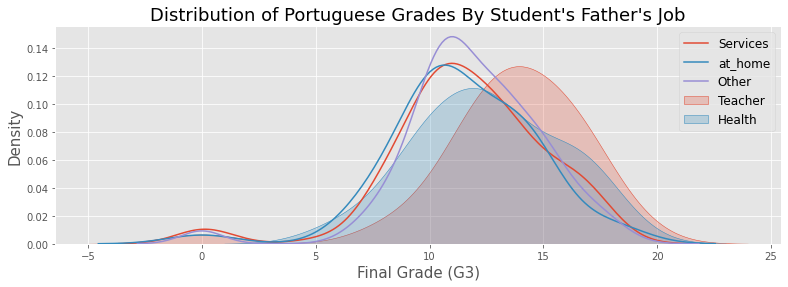

In [46]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['Fjob'] == 'teacher', 'G3'], label='Teacher', shade = True)
sns.kdeplot(por_data.loc[por_data['Fjob'] == 'health', 'G3'], label='Health', shade = True)
sns.kdeplot(por_data.loc[por_data['Fjob'] == 'services', 'G3'], label='Services', shade = False)
sns.kdeplot(por_data.loc[por_data['Fjob'] == 'at_home', 'G3'], label='at_home', shade = False)
sns.kdeplot(por_data.loc[por_data['Fjob'] == 'other', 'G3'], label='Other', shade = False)

plt.title('Distribution of Portuguese Grades By Student\'s Father\'s Job',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [47]:
n = por_data.loc[por_data['Fjob'] == 'teacher', 'G3']
p = por_data.loc[por_data['Fjob'] == 'health', 'G3']
f = por_data.loc[por_data['Fjob'] == 'services', 'G3']
s = por_data.loc[por_data['Fjob'] == 'at_home', 'G3']
h = por_data.loc[por_data['Fjob'] == 'other', 'G3']

print("The average Portuguese Grade of Student Based on Father's Education ")
print("Teacher : " , n.mean())
print("Health : " , p.mean())
print("Services : " , f.mean())
print("at_home : " , s.mean())
print("Others : " , h.mean())

The average Portuguese Grade of Student Based on Father's Education 
Teacher :  13.583333333333334
Health :  12.565217391304348
Services :  11.629834254143647
at_home :  11.428571428571429
Others :  11.89100817438692


* The students whose father are teacher seems to perform better then other students in the finals 

## Grade Analysis By Mother's Job

In [48]:
por_data['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

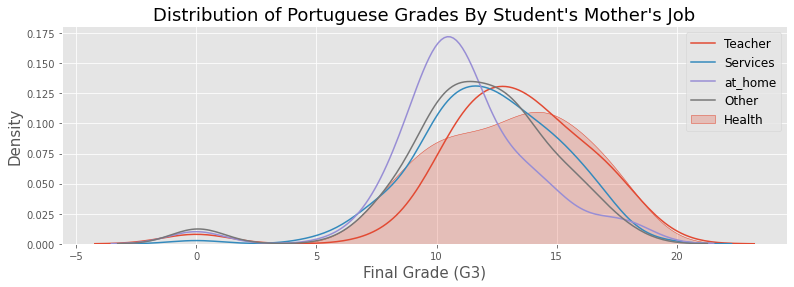

In [49]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['Mjob'] == 'teacher', 'G3'], label='Teacher', shade = False)
sns.kdeplot(por_data.loc[por_data['Mjob'] == 'health', 'G3'], label='Health', shade = True)
sns.kdeplot(por_data.loc[por_data['Mjob'] == 'services', 'G3'], label='Services', shade = False)
sns.kdeplot(por_data.loc[por_data['Mjob'] == 'at_home', 'G3'], label='at_home', shade = False)
sns.kdeplot(por_data.loc[por_data['Mjob'] == 'other', 'G3'], label='Other', shade = False)

plt.title('Distribution of Portuguese Grades By Student\'s Mother\'s Job',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [50]:
n = por_data.loc[por_data['Mjob'] == 'teacher', 'G3']
p = por_data.loc[por_data['Mjob'] == 'health', 'G3']
f = por_data.loc[por_data['Mjob'] == 'services', 'G3']
s = por_data.loc[por_data['Mjob'] == 'at_home', 'G3']
h = por_data.loc[por_data['Mjob'] == 'other', 'G3']

print("The average Portuguese Grade of Student Based on Father's Education ")
print("Teacher : " , n.mean())
print("Health : " , p.mean())
print("Services : " , f.mean())
print("at_home : " , s.mean())
print("Others : " , h.mean())

The average Portuguese Grade of Student Based on Father's Education 
Teacher :  13.13888888888889
Health :  13.0625
Services :  12.147058823529411
at_home :  11.044444444444444
Others :  11.670542635658915


* The students whose mother works at health related job and as a teacher seems to perform much better then that of others. 

## Grade Analysis Based On How Frequently Student Goes Out

In [51]:
por_data['goout'].value_counts()

3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64

*Goes Out*
* 1 = Very Low
* 2 = Low
* 3 = Medium
* 4 = High
* 5 = Very High


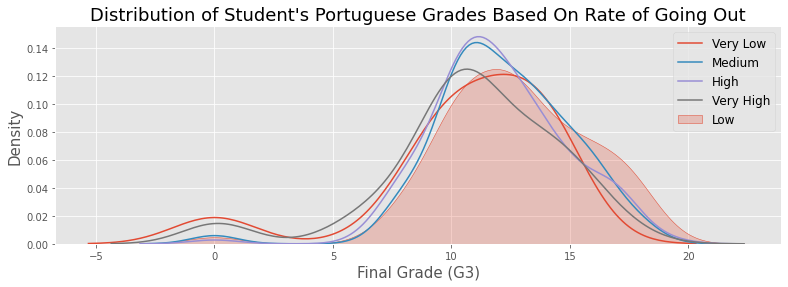

In [52]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['goout'] == 1, 'G3'], label='Very Low', shade = False)
sns.kdeplot(por_data.loc[por_data['goout'] == 2, 'G3'], label='Low', shade = True)
sns.kdeplot(por_data.loc[por_data['goout'] == 3, 'G3'], label='Medium', shade = False)
sns.kdeplot(por_data.loc[por_data['goout'] == 4, 'G3'], label='High', shade = False)
sns.kdeplot(por_data.loc[por_data['goout'] == 5, 'G3'], label='Very High', shade = False)

plt.title('Distribution of Student\'s Portuguese Grades Based On Rate of Going Out',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [53]:
e = por_data.loc[por_data['goout'] == 5, 'G3']
a = por_data.loc[por_data['goout'] == 1, 'G3']
b = por_data.loc[por_data['goout'] == 2, 'G3']
c = por_data.loc[por_data['goout'] == 3, 'G3']
d = por_data.loc[por_data['goout'] == 4, 'G3']

print("The average Portuguese Grade of Student Based on Their Rate of Going Out ")
print("Very Low : " , a.mean())
print("Low : " , b.mean())
print("Medium : " , c.mean())
print("High : " , d.mean())
print("Very High : " , e.mean())

The average Portuguese Grade of Student Based on Their Rate of Going Out 
Very Low :  10.729166666666666
Low :  12.668965517241379
Medium :  12.151219512195121
High :  11.97163120567376
Very High :  10.872727272727273


* The students who have low rate of going out seems to perform well on final exams. 

## Grade Analysis By Family Relationship

In [54]:
por_data['famrel'].value_counts()

4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64

*Family Relationship*
* 1 = Very bad
* 2 = Bad
* 3 = Good
* 4 = Very Good
* 5 = Excellent


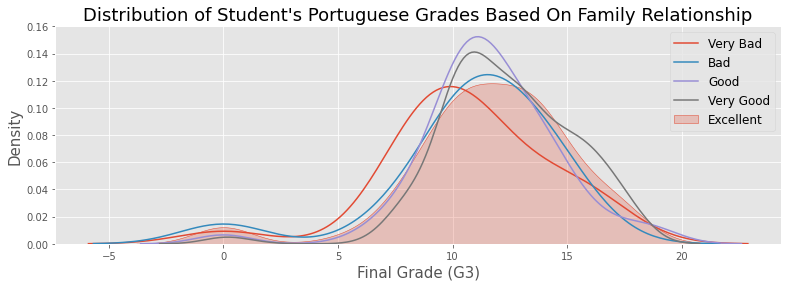

In [55]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(por_data.loc[por_data['famrel'] == 1, 'G3'], label='Very Bad', shade = False)
sns.kdeplot(por_data.loc[por_data['famrel'] == 2, 'G3'], label='Bad', shade = False)
sns.kdeplot(por_data.loc[por_data['famrel'] == 3, 'G3'], label='Good', shade = False)
sns.kdeplot(por_data.loc[por_data['famrel'] == 4, 'G3'], label='Very Good', shade = False)
sns.kdeplot(por_data.loc[por_data['famrel'] == 5, 'G3'], label='Excellent', shade = True)

plt.title('Distribution of Student\'s Portuguese Grades Based On Family Relationship',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [56]:
e = por_data.loc[por_data['famrel'] == 5, 'G3']
a = por_data.loc[por_data['famrel'] == 1, 'G3']
b = por_data.loc[por_data['famrel'] == 2, 'G3']
c = por_data.loc[por_data['famrel'] == 3, 'G3']
d = por_data.loc[por_data['famrel'] == 4, 'G3']

print("The average Portuguese Grade of Student Based Family Relationship ")
print("Very Low : " , a.mean())
print("Low : " , b.mean())
print("Medium : " , c.mean())
print("High : " , d.mean())
print("Very High : " , e.mean())

The average Portuguese Grade of Student Based Family Relationship 
Very Low :  10.636363636363637
Low :  10.862068965517242
Medium :  11.594059405940595
High :  12.343848580441641
Very High :  11.633333333333333


* The grade of student with the best family relationship is higher in portuguese 

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in objects:
    por_data[x] = encoder.fit_transform(por_data[x].astype(str))
por_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

* Directing all the features values in between 0 and n_classes-1

# Feature Engineering

## Univariate Selection

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [59]:
a = por_data.iloc[:,0:32]   #getting all the columns except the target column
b = por_data.iloc[:,-1]     #getting the G3 column

#selecting top 15 features and then obtaining their score alogn with columns
univariation_selected_features = SelectKBest(score_func = chi2, k = 15)
fit = univariation_selected_features.fit(a,b)
columns = pd.DataFrame(a.columns)
univariation_score = pd.DataFrame(fit.scores_)
f_score = pd.concat([columns, univariation_score], axis = 1)

f_score.columns = ['Features', 'Score']
print(f_score.nlargest(15,'Score'))

     Features       Score
31         G2  418.452113
30         G1  333.615973
29   absences  294.362769
14   failures  255.779332
0      school   60.035797
26       Dalc   35.491003
8        Mjob   34.888847
10     reason   33.617500
6        Medu   33.567952
7        Fedu   32.368762
27       Walc   25.772026
15  schoolsup   21.756390
13  studytime   19.574536
28     health   14.518698
17       paid   13.252095


* Using Chi-square selecting of 15 best features for students grade prediction

## Feature Importance 

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
# Using of extra tree classifier to obtain the top 15 features
ex_tree_classifier = ExtraTreesClassifier()
ex_tree_classifier.fit(a,b)
#An inbuilt class 
print(ex_tree_classifier.feature_importances_)

[0.01823065 0.02361242 0.03823852 0.01949521 0.0224323  0.01417941
 0.03321426 0.03504863 0.03427201 0.03078492 0.0325929  0.02414135
 0.02902484 0.02894404 0.01721508 0.01056503 0.02682114 0.00869173
 0.02290548 0.01795729 0.01087206 0.01774726 0.02282708 0.03367342
 0.03637234 0.03652266 0.02346512 0.03461898 0.03707884 0.04054426
 0.08494793 0.13296284]


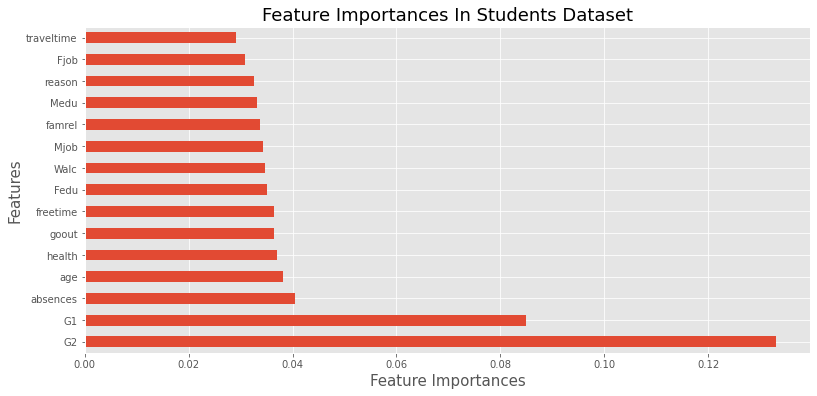

In [62]:
feature_importance = pd.Series(ex_tree_classifier.feature_importances_, index = a.columns)
fig =  plt.subplots(figsize=(13,6))
feature_importance.nlargest(15).plot(kind = 'barh')
plt.title('Feature Importances In Students Dataset',  fontsize = 18)
plt.xlabel('Feature Importances', fontsize = 15);
plt.ylabel('Features', fontsize = 15)
plt.show()

In [63]:
feature_importance.nlargest(15)

G2            0.132963
G1            0.084948
absences      0.040544
age           0.038239
health        0.037079
goout         0.036523
freetime      0.036372
Fedu          0.035049
Walc          0.034619
Mjob          0.034272
famrel        0.033673
Medu          0.033214
reason        0.032593
Fjob          0.030785
traveltime    0.029025
dtype: float64

* Plotting the chart displaying the top 15 important features present in the dataset with an inbuilt class (Feature Importance) using Extra Tree Classifier 

## Correlation

In [64]:
por_data.corr()['G3'].sort_values() #looking for highly correlated features

failures     -0.393316
school       -0.284294
Dalc         -0.204719
Walc         -0.176619
sex          -0.129077
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
romantic     -0.090583
goout        -0.087641
guardian     -0.079609
schoolsup    -0.066405
paid         -0.054898
Pstatus      -0.000754
nursery       0.028752
famsize       0.045016
Fjob          0.052953
famsup        0.059206
activities    0.059791
famrel        0.063361
reason        0.124969
Mjob          0.148252
internet      0.150025
address       0.167637
Fedu          0.211800
Medu          0.240151
studytime     0.249789
higher        0.332172
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64

* Identifying all the features which are correlated with Final Grade after the use of Label Encoder

In [65]:
top_correlated = por_data.corr().abs()['G3'].sort_values(ascending = False)
top_correlated[:16].index

Index(['G3', 'G2', 'G1', 'failures', 'higher', 'school', 'studytime', 'Medu',
       'Fedu', 'Dalc', 'Walc', 'address', 'internet', 'Mjob', 'sex',
       'traveltime'],
      dtype='object')

* Keeping track of top 15 highly correlated features

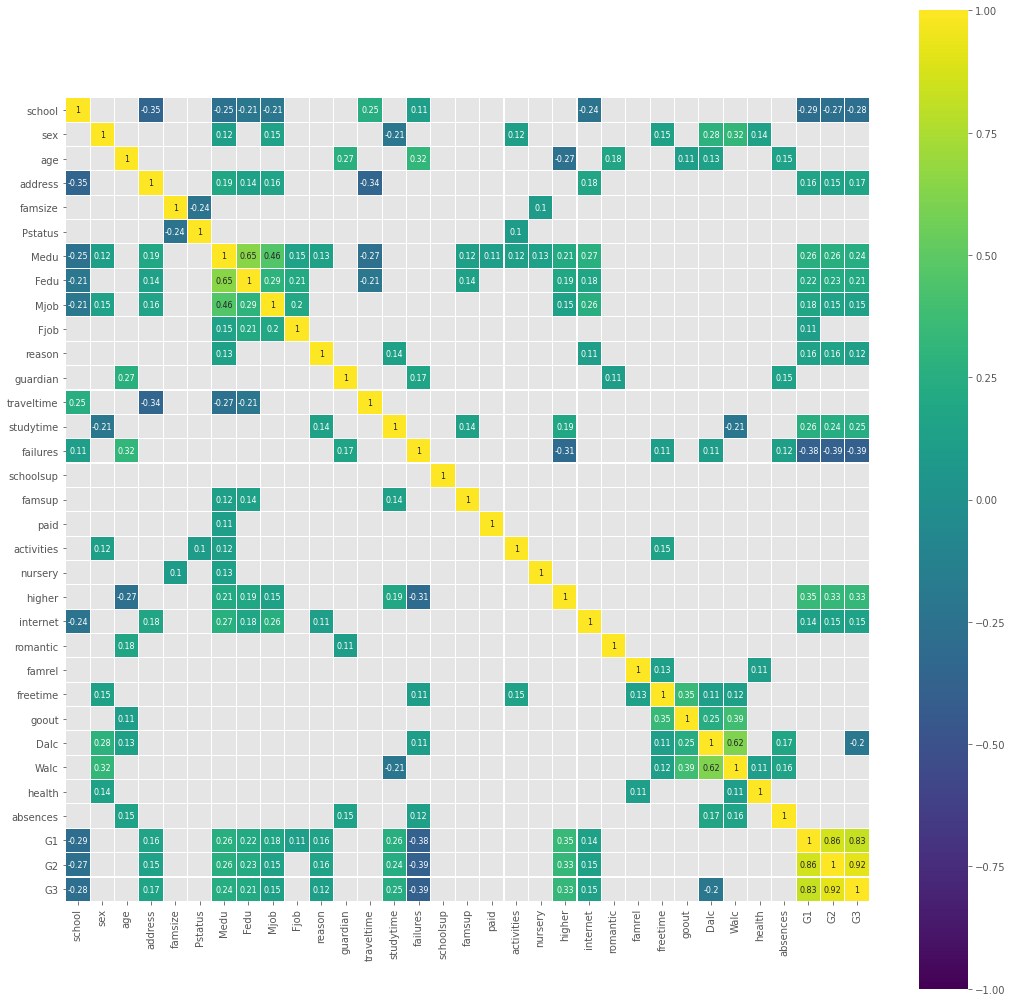

In [66]:
plt.figure(figsize=(18, 18))
correlated = por_data.corr()
sns.heatmap(correlated[(correlated >= 0.10) | (correlated <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Machine Learning Algorithms

## Training and Testing Set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# #Using Univariation Selection
features = f_score.nlargest(5,'Score')
columns = np.array(features['Features'])
X = (por_data[columns])
X.columns

Index(['G2', 'G1', 'absences', 'failures', 'school'], dtype='object')

In [69]:
#Using Feature Importance
columns = ['G2', 'G1', 'age', 'absences','freetime']
X2 = (por_data[columns])
X2.columns

Index(['G2', 'G1', 'age', 'absences', 'freetime'], dtype='object')

In [70]:
#Using Correlation
columns = [ 'G2', 'G1', 'failures', 'higher', 'school']
X3 = (por_data[columns])
X3.columns

Index(['G2', 'G1', 'failures', 'higher', 'school'], dtype='object')

In [71]:
Y = por_data.G3

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [73]:
print('Shape of Training Features:', X_train.shape)
print('Shape of Training Labels:', y_train.shape)
print('Shape of Testing Features:', X_test.shape)
print('Shape of Training Labels:', y_test.shape)

Shape of Training Features: (486, 5)
Shape of Training Labels: (486,)
Shape of Testing Features: (163, 5)
Shape of Training Labels: (163,)


## Training Model

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import svm
from sklearn import tree
from io import StringIO  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

## Random Forest

In [75]:
def random_forest_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Random Forest" + '\033[0m')
    
    list = [X,X2,X3]
    
    rf_train_scores = []
    rf_test_scores = []
    rf_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
        random_forest.fit(X_train, y_train);
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",random_forest.score(X_train,y_train))
        print("Testing Accuracy : ", random_forest.score(X_test,y_test))
        print("")
       
        #Testing 
        predictions = random_forest.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list) 
        print("")
        
        #5-fold Cross validation
        print('\033[1m\033[4m' + "\n" + "Cross Validation"+ '\033[0m')
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(random_forest, h,Y,scoring='r2',cv = folds)
        cross_pred = cross_val_predict(random_forest, h,Y,cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nCross-Validation Metrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(Y, cross_pred, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(Y, cross_pred, squared=False))
        print("R2-Score : ", r2_score(Y, cross_pred))
        
        #Creating Accuracy Dataframe
        rf_train_scores.append(random_forest.score(X_train,y_train))
        rf_test_scores.append(random_forest.score(X_test,y_test))
        rf_cv_scores.append(sum(value) / len(value))
        
        rf_scores_list = {'Training Score' :rf_train_scores , 'Testing Score' : rf_test_scores, 
                        'Cross Validation Score' :rf_cv_scores}
        rf_score_df = pd.DataFrame(rf_scores_list)
        
    return random_forest,rf_score_df,metrics_list_df

random_forest, rf_score_df,metrics_list_df = random_forest_model(X,X2,X3,Y)

Random Forest

 Univeriant Selection 

Train Test Split

Training Accuracy :  0.9556582298181938
Testing Accuracy :  0.8539584029385315

 Predicted Grade  Final Grade
       17.205833           19
       11.855373           12
       18.032833           18
       11.496833           11
       11.300024           11


Metrics
Mean Square Error :  1.4721898838558933
Root Mean Square Error :  1.2133383220915317
R2-Score :  0.8539584029385315


Cross Validation
Fold- 1 = 0.8317176737382684
Fold- 2 = 0.861848659347048
Fold- 3 = 0.7914503541808078
Fold- 4 = 0.8473923534011243
Fold- 5 = 0.8670398932718253

Cross Validation Average: 0.8398897867878148 


Cross-Validation Metrics
Mean Square Error :  1.7087189609186553
Root Mean Square Error :  1.3071797737567146
R2-Score :  0.8360321014776873

 Feature Importance 

Train Test Split

Training Accuracy :  0.9535968105003247
Testing Accuracy :  0.8536133107033215

 Predicted Grade  Final Grade
       17.208333           19
       11.080000       

In [76]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=rf_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=rf_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=rf_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Random Forest", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [77]:
rf_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
rf_score_df = rf_score_df.set_index('Feature Selection')
rf_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.955658,0.853958,0.839890
Feature Importance,0.953597,0.853613,0.822985
Correlation,0.929700,0.775734,0.813076


In [78]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,1.472190,1.213338,0.853958
Feature Importance,1.475669,1.214771,0.853613
Correlation,2.260738,1.503575,0.775734


### Random Forest Hyper Parameter Tuning

In [79]:
def random_forest_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Random Forest" + '\033[0m')
    
    list = [X,X2,X3]
    
    rf_train_scores = []
    rf_test_scores = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        
        n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
        max_features = ['auto', 'sqrt']
        max_depth = [2,4]
        min_samples_split = [2, 5]
        min_samples_leaf = [1, 2]
        bootstrap = [True, False]

        param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
                      'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

        f = RandomForestRegressor()
        random_forest = GridSearchCV(estimator = f, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        random_forest.fit(X_train, y_train)        
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",random_forest.score(X_train,y_train))
        print("Testing Accuracy : ", random_forest.score(X_test,y_test))
        print("")
        
        #Creating Accuracy Dataframe
        rf_train_scores.append(random_forest.score(X_train,y_train))
        rf_test_scores.append(random_forest.score(X_test,y_test))
        
        rf_scores_list = {'Training Score' :rf_train_scores , 'Testing Score' : rf_test_scores}
        rf_score_df2 = pd.DataFrame(rf_scores_list)
        
    return rf_score_df2, random_forest
        
rf_score_df2, random_forest_hyper_parameter = random_forest_model_hyper_parameterTuning(X,X2,X3,Y)

Random Forest
Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  35 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   14.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Univeriant Selection 

Train Test Split

Training Accuracy :  0.8798000272194892
Testing Accuracy :  0.8731671665024708

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   13.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Train Test Split

Training Accuracy :  0.8880362404815583
Testing Accuracy :  0.8662044185367973

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:    8.5s



 Correlation 

Train Test Split

Training Accuracy :  0.8597517881660396
Testing Accuracy :  0.8740166219034091



[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   12.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   12.6s finished


In [80]:
print("The set of best parameters selected are:")
random_forest_hyper_parameter.best_params_

The set of best parameters selected are:


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}

In [81]:
rf_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
rf_score_df2 = rf_score_df2.set_index('Feature Selection')
rf_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.879800,0.873167
Feature Importance,0.888036,0.866204
Correlation,0.859752,0.874017


In [82]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=rf_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=rf_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=rf_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Random Forest Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [83]:
def hyper_parameter_tuning(model, f_score, Y):
    hyper_parameters = [{'n_features_to_select' : list(range(1,15))}]
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
    rfe = RFE(model)
    model_cross_val = GridSearchCV(estimator = rfe, param_grid = hyper_parameters,scoring= 'r2',cv = folds, 
                                            verbose = 1,return_train_score=True);
    f = f_score.nlargest(15,'Score')
    c = np.array(f['Features'])
    par = (por_data[c])
    par.columns
    X_train, X_test, y_train, y_test = train_test_split(par, Y, test_size=0.25, random_state=42)
    model_cross_val.fit(X_train,y_train)
    return model_cross_val

def optimal_feature_plot(random_forest_cross_val_res):
    fig =  plt.subplots(figsize=(13,4))
    plt.plot(random_forest_cross_val_res["param_n_features_to_select"],random_forest_cross_val_res["mean_test_score"])
    plt.plot(random_forest_cross_val_res["param_n_features_to_select"],random_forest_cross_val_res["mean_train_score"])
    plt.title('Optimal Number of Features',  fontsize = 18)
    plt.xlabel('Number of Features', fontsize = 15);
    plt.ylabel('R-Score', fontsize = 15)
    plt.legend(['Test score', 'Train Score'],prop={'size': 12})
    plt.show()

In [84]:
random_forest_hyper_para = hyper_parameter_tuning(random_forest,f_score,Y)
random_forest_cross_val_res = pd.DataFrame(random_forest_hyper_para.cv_results_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.4min finished


In [85]:
random_forest_cross_val_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.053818,0.053588,0.007585,0.000794,1,{'n_features_to_select': 1},0.796061,0.812472,0.853783,0.796778,...,0.817119,0.021500,12,0.849083,0.849384,0.837565,0.847891,0.844982,0.845781,0.004392
1,2.015825,0.094228,0.007181,0.000399,2,{'n_features_to_select': 2},0.813431,0.780358,0.854130,0.826981,...,0.818597,0.023757,10,0.888920,0.889720,0.880143,0.885929,0.886029,0.886148,0.003364
2,1.844471,0.067579,0.007779,0.000977,3,{'n_features_to_select': 3},0.826460,0.819392,0.819928,0.796470,...,0.820602,0.014318,5,0.919013,0.926516,0.919339,0.928560,0.915630,0.921812,0.004895
3,1.599925,0.035595,0.006774,0.000395,4,{'n_features_to_select': 4},0.796369,0.816682,0.776630,0.786088,...,0.803020,0.022506,14,0.952418,0.957127,0.959843,0.963174,0.956660,0.957845,0.003571
4,1.540672,0.018900,0.007586,0.000480,5,{'n_features_to_select': 5},0.801248,0.827948,0.848067,0.779493,...,0.819609,0.025675,7,0.965885,0.969679,0.971077,0.972902,0.962210,0.968351,0.003839


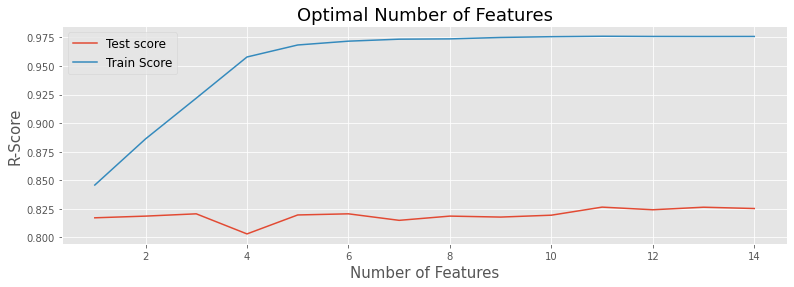

In [86]:
optimal_feature_plot(random_forest_cross_val_res)

## Linear Regression

In [87]:
def linear_regression_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Linear Regression" + '\033[0m')
    
    list = [X,X2,X3]
    
    lr_train_scores = []
    lr_test_scores = []
    lr_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        linear_regression = LinearRegression()
        linear_regression.fit(X_train, y_train);        
        
        if j == "Univeriant Selection":
            
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",linear_regression.score(X_train,y_train))
        print("Testing Accuracy : ", linear_regression.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = linear_regression.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(linear_regression, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)           
        
        #Creating Accuracy Dataframe
        lr_train_scores.append(linear_regression.score(X_train,y_train))
        lr_test_scores.append(linear_regression.score(X_test,y_test))
        lr_cv_scores.append(sum(value) / len(value))
        
        lr_scores_list = {'Training Score' :lr_train_scores , 'Testing Score' : lr_test_scores, 
                        'Cross Validation Score' :lr_cv_scores}
        lr_score_df = pd.DataFrame(lr_scores_list)
        
    return linear_regression,lr_score_df,metrics_list_df

linear_regression, lr_score_df,metrics_list_df = linear_regression_model(X,X2,X3,Y)

Linear Regression

 Univeriant Selection 

Training Accuracy :  0.8399480246977127
Testing Accuracy :  0.8778255440629801

 Predicted Grade  Final Grade
       18.393193           19
       11.441365           12
       18.484602           18
       11.075909           11
       11.803284           11

Fold- 1 = 0.8264686778694106
Fold- 2 = 0.8215114274353263
Fold- 3 = 0.8887657418136382
Fold- 4 = 0.8378350276832005
Fold- 5 = 0.8155091318580597

Cross Validation Average: 0.8380180013319272 


Metrics
Mean Square Error :  1.2315942972081722
Root Mean Square Error :  1.1097721825708968
R2-Score :  0.8778255440629801

 Feature Importance 

Training Accuracy :  0.8390373275737466
Testing Accuracy :  0.8748794366204256

 Predicted Grade  Final Grade
       18.776853           19
       11.324547           12
       18.769998           18
       11.211950           11
       11.730685           11

Fold- 1 = 0.8246000456881244
Fold- 2 = 0.8211944202636585
Fold- 3 = 0.8836942377642116
Fold- 4

In [88]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=lr_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=lr_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=lr_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Linear Regression", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [89]:
lr_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
lr_score_df = lr_score_df.set_index('Feature Selection')
lr_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.839948,0.877826,0.838018
Feature Importance,0.839037,0.874879,0.836569
Correlation,0.838997,0.877574,0.837539


In [90]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,1.231594,1.109772,0.877826
Feature Importance,1.261293,1.123073,0.874879
Correlation,1.234128,1.110913,0.877574


### Linear Regression Hyper Parameter Tuning

In [91]:
def linear_regression_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Linear Regression" + '\033[0m')
    
    list = [X,X2,X3]
    
    lr_train_scores = []
    lr_test_scores = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)        
        param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
        lr_model = LinearRegression()
        linear_regression= GridSearchCV(estimator = lr_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        linear_regression.fit(X_train, y_train)

        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",linear_regression.score(X_train,y_train))
        print("Testing Accuracy : ", linear_regression.score(X_test,y_test))
        print("")       
    
        #Creating Accuracy Dataframe
        lr_train_scores.append(linear_regression.score(X_train,y_train))
        lr_test_scores.append(linear_regression.score(X_test,y_test))
        lr_scores_list = {'Training Score' :lr_train_scores , 'Testing Score' : lr_test_scores}
        lr_score_df2 = pd.DataFrame(lr_scores_list)
        
    return linear_regression,lr_score_df2

linear_regression_hyper_parameter, lr_score_df2 = linear_regression_model_hyper_parameterTuning(X,X2,X3,Y)

Linear Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Univeriant Selection 

Train Test Split

Training Accuracy :  0.8398947142407877
Testing Accuracy :  0.878746284529361

Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Feature Importance 

Train Test Split

Training Accuracy : 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  17 out of  24 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished


 0.8390356232849088
Testing Accuracy :  0.8749180620167165

Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Correlation 

Train Test Split

Training Accuracy :  0.8389834101812699
Testing Accuracy :  0.8772827373981541



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished


In [92]:
print("The set of best parameters selected are:")
linear_regression_hyper_parameter.best_params_

The set of best parameters selected are:


{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [93]:
lr_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
lr_score_df2 = lr_score_df2.set_index('Feature Selection')
lr_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.839895,0.878746
Feature Importance,0.839036,0.874918
Correlation,0.838983,0.877283


In [94]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=lr_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=lr_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=lr_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Linear Regression Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [95]:
linear_regression_hyper_para = hyper_parameter_tuning(linear_regression,f_score,Y)
linear_regression_cross_val_res = pd.DataFrame(linear_regression_hyper_para.cv_results_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


In [96]:
linear_regression_cross_val_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014761,0.003051,0.002394,0.000798,1,{'n_features_to_select': 1},0.818977,0.814080,0.883515,0.827102,...,0.831014,0.026789,12,0.832567,0.834358,0.818978,0.830478,0.834847,0.830246,0.005839
1,0.009973,0.002601,0.001995,0.000631,2,{'n_features_to_select': 2},0.819115,0.816463,0.883923,0.829503,...,0.831350,0.027187,10,0.833994,0.837061,0.820337,0.831359,0.837041,0.831959,0.006187
2,0.009575,0.001621,0.001995,0.000631,3,{'n_features_to_select': 3},0.826591,0.819225,0.879852,0.829456,...,0.833270,0.024134,3,0.835277,0.837674,0.824239,0.834659,0.839551,0.834280,0.005315
3,0.009375,0.001017,0.001995,0.000631,4,{'n_features_to_select': 4},0.824188,0.820084,0.869722,0.839617,...,0.832048,0.021576,4,0.835939,0.844258,0.825719,0.838564,0.841309,0.837158,0.006355
4,0.007979,0.000631,0.002195,0.000399,5,{'n_features_to_select': 5},0.827551,0.820062,0.881149,0.839896,...,0.835875,0.024569,1,0.841467,0.845365,0.829937,0.839062,0.846477,0.840462,0.005898


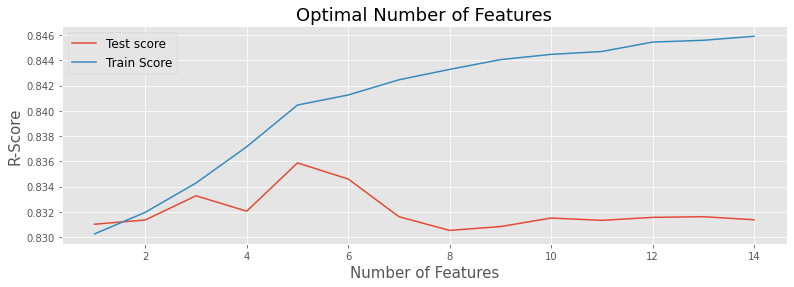

In [97]:
optimal_feature_plot(linear_regression_cross_val_res)

## Support Vector Machnie - (SVM)

In [98]:
def svm_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Support Vector Machine" + '\033[0m')
    
    list = [X,X2,X3]
    
    svm_train_scores = []
    svm_test_scores = []
    svm_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        model_SVM = svm.SVC(kernel='linear');
        model_SVM.fit(X_train, y_train);

        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",model_SVM.score(X_train,y_train))
        print("Testing Accuracy : ", model_SVM.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = model_SVM.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(model_SVM, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)
        
        
        #Creating Accuracy Dataframe
        svm_train_scores.append(model_SVM.score(X_train,y_train))
        svm_test_scores.append(model_SVM.score(X_test,y_test))
        svm_cv_scores.append(sum(value) / len(value))
        
        svm_scores_list = {'Training Score' :svm_train_scores , 'Testing Score' : svm_test_scores, 
                        'Cross Validation Score' :svm_cv_scores}
        svm_score_df = pd.DataFrame(svm_scores_list)
        
    return model_SVM,svm_score_df,metrics_list_df

model_SVM, svm_score_df,metrics_list_df = svm_model(X,X2,X3,Y)

Support Vector Machine

Train Test Split

 Univeriant Selection 

Training Accuracy :  0.5205761316872428
Testing Accuracy :  0.4110429447852761

 Predicted Grade  Final Grade
              18           19
              11           12
              19           18
              11           11
              11           11

Fold- 1 = 0.6082583377448385
Fold- 2 = 0.7868945627279667
Fold- 3 = 0.8677589093518296
Fold- 4 = 0.763502252947349
Fold- 5 = 0.7729338478716528

Cross Validation Average: 0.7598695821287273 


Metrics
Mean Square Error :  1.8588957055214723
Root Mean Square Error :  1.3634132555910816
R2-Score :  0.8155970907135817

Train Test Split

 Feature Importance 

Training Accuracy :  0.5555555555555556
Testing Accuracy :  0.4723926380368098

 Predicted Grade  Final Grade
              17           19
              11           12
              17           18
              11           11
              11           11

Fold- 1 = 0.6590788777130756
Fold- 2 = 0.8650606497582

In [99]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Support Vector Machine", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [100]:
svm_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
svm_score_df = svm_score_df.set_index('Feature Selection')
svm_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.520576,0.411043,0.759870
Feature Importance,0.555556,0.472393,0.797718
Correlation,0.518519,0.417178,0.753123


In [101]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,1.858896,1.363413,0.815597
Feature Importance,2.073620,1.440007,0.794296
Correlation,1.521472,1.233480,0.849070


### Support Vector Machine Hyper Parameter Tuning

In [102]:
def svm_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Support Vector Machine" + '\033[0m')
    
    list = [X,X2,X3]
    
    svm_train_scores = []
    svm_test_scores = []
    svm_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        
        param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
        svm_model = svm.SVC()
        model_SVM = GridSearchCV(estimator = svm_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        model_SVM.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",model_SVM.score(X_train,y_train))
        print("Testing Accuracy : ", model_SVM.score(X_test,y_test))
        print("") 
        
        #Creating Accuracy Dataframe
        svm_train_scores.append(model_SVM.score(X_train,y_train))
        svm_test_scores.append(model_SVM.score(X_test,y_test))
        
        svm_scores_list = {'Training Score' :svm_train_scores , 'Testing Score' : svm_test_scores}
        svm_score_df = pd.DataFrame(svm_scores_list)
        
    return model_SVM,svm_score_df

model_SVM_hyper_parameter, svm_score_df = svm_model_hyper_parameterTuning(X,X2,X3,Y)

Support Vector Machine
Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Univeriant Selection 

Training Accuracy :  0.5205761316872428
Testing Accuracy :  0.4110429447852761

Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Feature Importance 

Training Accuracy :  0.5823045267489712
Testing Accuracy :  0.4662576687116564

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_j


 Correlation 

Training Accuracy :  0.5329218106995884
Testing Accuracy :  0.4785276073619632



In [103]:
print("The set of best parameters selected are:")
model_SVM_hyper_parameter.best_params_

The set of best parameters selected are:


{'C': 10, 'kernel': 'rbf'}

In [104]:
svm_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
svm_score_df = svm_score_df.set_index('Feature Selection')
svm_score_df

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.520576,0.411043
Feature Importance,0.582305,0.466258
Correlation,0.532922,0.478528


In [105]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Support Vector Machine Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [106]:
model_SVM_hyper_para = hyper_parameter_tuning(model_SVM,f_score,Y)
model_SVM_cross_val_res = pd.DataFrame(model_SVM_hyper_para.cv_results_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.5s finished


In [107]:
model_SVM_cross_val_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126469,0.003598,0.001993,0.000002,1,{'n_features_to_select': 1},0.753309,0.787717,0.874719,0.799426,...,0.803511,0.039644,3,0.805410,0.799741,0.786045,0.808883,0.805387,0.801093,0.008075
1,0.121674,0.003514,0.002593,0.000488,2,{'n_features_to_select': 2},0.770249,0.795945,0.890959,0.850318,...,0.818931,0.044898,1,0.816970,0.804399,0.786045,0.803010,0.805882,0.803261,0.009925
2,0.115099,0.002857,0.001995,0.000003,3,{'n_features_to_select': 3},0.718370,0.811579,0.879359,0.852314,...,0.811471,0.055122,2,0.846592,0.810867,0.805882,0.827970,0.834814,0.825225,0.015075
3,0.109907,0.002704,0.002381,0.000501,4,{'n_features_to_select': 4},0.709899,0.743286,0.873559,0.593863,...,0.743459,0.093021,9,0.850686,0.829496,0.825247,0.846568,0.840996,0.838598,0.009762
4,0.104309,0.002053,0.002000,0.000013,5,{'n_features_to_select': 5},0.710958,0.749869,0.865439,0.656729,...,0.754796,0.070873,6,0.845388,0.830013,0.831623,0.839716,0.856575,0.840663,0.009711


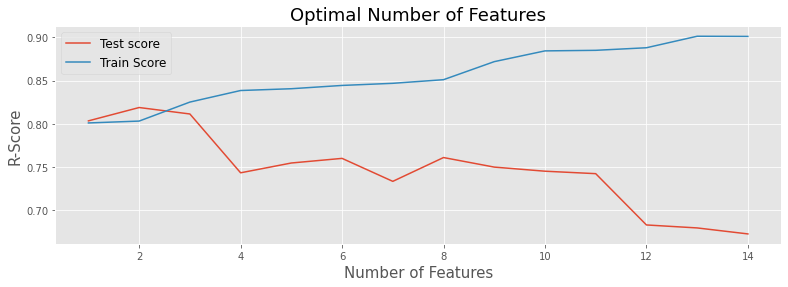

In [108]:
optimal_feature_plot(model_SVM_cross_val_res)

## Naive Bayes (Gaussian)

In [109]:
def naive_bayes_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Naive Bays" + '\033[0m')
    
    list = [X,X2,X3]
    
    nb_train_scores = []
    nb_test_scores = []
    nb_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        naive_bayes_gaussian = GaussianNB()
        naive_bayes_gaussian.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",naive_bayes_gaussian.score(X_train,y_train))
        print("Testing Accuracy : ", naive_bayes_gaussian.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = naive_bayes_gaussian.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(naive_bayes_gaussian, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)
        
        #Creating Accuracy Dataframe
        nb_train_scores.append(naive_bayes_gaussian.score(X_train,y_train))
        nb_test_scores.append(naive_bayes_gaussian.score(X_test,y_test))
        nb_cv_scores.append(sum(value) / len(value))
        
        nb_scores_list = {'Training Score' :nb_train_scores , 'Testing Score' : nb_test_scores, 
                        'Cross Validation Score' :nb_cv_scores}
        nb_score_df = pd.DataFrame(nb_scores_list)
        
    return naive_bayes_gaussian,nb_score_df,metrics_list_df

naive_bayes_gaussian, nb_score_df,metrics_list_df = naive_bayes_model(X,X2,X3,Y)

Naive Bays

 Univeriant Selection 

Training Accuracy :  0.3436213991769547
Testing Accuracy :  0.25766871165644173

 Predicted Grade  Final Grade
              18           19
              14           12
              18           18
              14           11
              14           11

Fold- 1 = 0.24616199047114862
Fold- 2 = 0.35492408177114243
Fold- 3 = -0.5080124372159771
Fold- 4 = -0.086692179495093
Fold- 5 = 0.12498775686105523

Cross Validation Average: 0.026273842478455232 


Metrics
Mean Square Error :  9.625766871165645
Root Mean Square Error :  3.102542001515152
R2-Score :  0.04512156874458628

 Feature Importance 

Training Accuracy :  0.4711934156378601
Testing Accuracy :  0.4110429447852761

 Predicted Grade  Final Grade
              17           19
              11           12
              17           18
              11           11
              12           11

Fold- 1 = -1.107993647432504
Fold- 2 = 0.009347697005683053
Fold- 3 = -0.9047357091604882
Fold-

In [110]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=nb_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=nb_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=nb_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For Naive Bays ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [111]:
nb_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
nb_score_df = nb_score_df.set_index('Feature Selection')
nb_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.343621,0.257669,0.026274
Feature Importance,0.471193,0.411043,-0.502401
Correlation,0.141975,0.128834,-0.953786


In [112]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,9.625767,3.102542,0.045122
Feature Importance,10.030675,3.167124,0.004955
Correlation,21.662577,4.654307,-1.148933


### Naive Bayes Machine Hyper Parameter Tuning

In [113]:
def naive_bayes_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Naive Bays" + '\033[0m')
    
    list = [X,X2,X3]
    
    nb_train_scores = []
    nb_test_scores = []
    nb_cv_scores = []  
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
       
        param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
        nb_model = GaussianNB()
        naive_bayes_gaussian = GridSearchCV(estimator = nb_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        naive_bayes_gaussian.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",naive_bayes_gaussian.score(X_train,y_train))
        print("Testing Accuracy : ", naive_bayes_gaussian.score(X_test,y_test))
        print("")        
        
        #Creating Accuracy Dataframe
        nb_train_scores.append(naive_bayes_gaussian.score(X_train,y_train))
        nb_test_scores.append(naive_bayes_gaussian.score(X_test,y_test))
        
        nb_scores_list = {'Training Score' :nb_train_scores , 'Testing Score' : nb_test_scores}
        nb_score_df = pd.DataFrame(nb_scores_list)
        
    return naive_bayes_gaussian,nb_score_df

naive_bayes_gaussian_hyper_parameter, nb_score_df2 = naive_bayes_model(X,X2,X3,Y)

Naive Bays
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Univeriant Selection 

Training Accuracy :  0.4897119341563786
Testing Accuracy :  0.4539877300613497

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Training Accuracy :  0.5164609053497943
Testing Accuracy :  0.4110429447852761

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished



 Correlation 

Training Accuracy :  0.4876543209876543
Testing Accuracy :  0.44171779141104295



In [114]:
print("The set of best parameters selected are:")
naive_bayes_gaussian_hyper_parameter.best_params_

The set of best parameters selected are:


{'var_smoothing': 0.2848035868435802}

In [115]:
nb_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
nb_score_df2 = nb_score_df2.set_index('Feature Selection')
nb_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.489712,0.453988
Feature Importance,0.516461,0.411043
Correlation,0.487654,0.441718


In [116]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Support Vector Machine Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

## k-nearest neighbors (KNN)

In [117]:
def knn(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "KNN" + '\033[0m')
    
    list = [X,X2,X3]
    
    knn_train_scores = []
    knn_test_scores = []
    knn_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        neigh = KNeighborsClassifier()
        neigh.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",neigh.score(X_train,y_train))
        print("Testing Accuracy : ", neigh.score(X_test,y_test))
        print("")
        
    
        ##Testing 
        predictions = neigh.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(neigh, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)        
        
        #Creating Accuracy Dataframe
        knn_train_scores.append(neigh.score(X_train,y_train))
        knn_test_scores.append(neigh.score(X_test,y_test))
        knn_cv_scores.append(sum(value) / len(value))
        
        knn_scores_list = {'Training Score' :knn_train_scores , 'Testing Score' : knn_test_scores, 
                        'Cross Validation Score' :knn_cv_scores}
        knn_score_df = pd.DataFrame(knn_scores_list)
        
    return neigh,knn_score_df,metrics_list_df

neigh, knn_score_df,metrics_list_df = knn(X,X2,X3,Y)

KNN

 Univeriant Selection 

Training Accuracy :  0.551440329218107
Testing Accuracy :  0.36809815950920244

 Predicted Grade  Final Grade
              17           19
              11           12
              17           18
              11           11
              12           11

Fold- 1 = 0.6876654314452091
Fold- 2 = 0.742463313258122
Fold- 3 = 0.7969983257593877
Fold- 4 = 0.7485340411085735
Fold- 5 = 0.7824345236929225

Cross Validation Average: 0.751619127052843 


Metrics
Mean Square Error :  2.736196319018405
Root Mean Square Error :  1.654145192846869
R2-Score :  0.7285686549777473

 Feature Importance 

Training Accuracy :  0.5576131687242798
Testing Accuracy :  0.4171779141104294

 Predicted Grade  Final Grade
              17           19
              12           12
              17           18
              11           11
              13           11

Fold- 1 = 0.6506087877183695
Fold- 2 = 0.787717363644075
Fold- 3 = 0.6415570437694331
Fold- 4 = 0.78146410715387

In [118]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=knn_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=knn_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=knn_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For KNN ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [119]:
knn_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
knn_score_df = knn_score_df.set_index('Feature Selection')
knn_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.551440,0.368098,0.751619
Feature Importance,0.557613,0.417178,0.731417
Correlation,0.567901,0.435583,0.696832


In [120]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,2.736196,1.654145,0.728569
Feature Importance,2.938650,1.714249,0.708485
Correlation,3.288344,1.813379,0.673796


## k-nearest neighbour Hyperparameter Tuning

In [121]:
def knn(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "KNN" + '\033[0m')
    
    list = [X,X2,X3]
    
    knn_train_scores = []
    knn_test_scores = []
    knn_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        param_grid = {'n_neighbors': [1,2,3,4,5],'p': [1, 2, 5]}
        knn_model = KNeighborsClassifier()
        neigh = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        neigh.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",neigh.score(X_train,y_train))
        print("Testing Accuracy : ", neigh.score(X_test,y_test))
        print("")
        
        
        #Creating Accuracy Dataframe
        knn_train_scores.append(neigh.score(X_train,y_train))
        knn_test_scores.append(neigh.score(X_test,y_test))
        
        knn_scores_list = {'Training Score' :knn_train_scores , 'Testing Score' : knn_test_scores}
        knn_score_df = pd.DataFrame(knn_scores_list)
        
    return neigh,knn_score_df
knn_hyper_parameter, knn_score_df2 = knn(X,X2,X3,Y)

KNN
Fitting 3 folds for each of 15 candidates, totalling 45 fits

 Univeriant Selection 

Training Accuracy :  0.551440329218107
Testing Accuracy :  0.36809815950920244

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Training Accuracy :  0.5576131687242798
Testing Accuracy :  0.4171779141104294



[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished


Fitting 3 folds for each of 15 candidates, totalling 45 fits

 Correlation 

Training Accuracy :  0.588477366255144
Testing Accuracy :  0.3987730061349693



In [122]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=knn_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=knn_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=knn_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For KNN ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [123]:
knn_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
knn_score_df2 = knn_score_df2.set_index('Feature Selection')
knn_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.551440,0.368098
Feature Importance,0.557613,0.417178
Correlation,0.588477,0.398773


In [124]:
print("The set of best parameters selected are:")
knn_hyper_parameter.best_params_

The set of best parameters selected are:


{'n_neighbors': 4, 'p': 2}

# Unsupervised Models

In [125]:
from sklearn.cluster import AgglomerativeClustering,KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc

## Hierarchical clustering

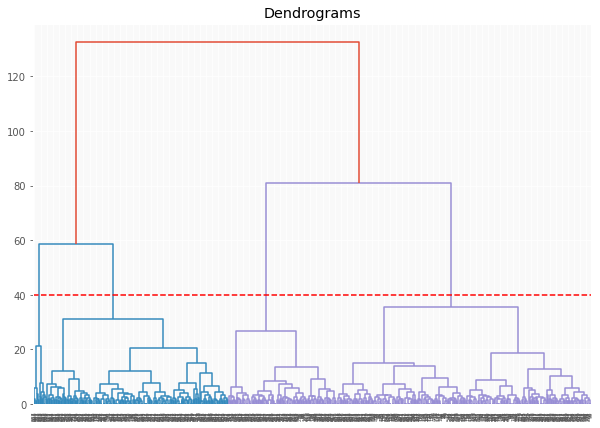

In [126]:
#Linkage Matrix
hc_data = por_data[['G1','G2','G3','sex','age']]
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = hc.dendrogram(hc.linkage(hc_data, method='ward'));
plt.axhline(y=40, color='r', linestyle='--');